In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


In [3]:
train.head()
#will assume that the information on the name and ticket is useless/noisy ,or explained by other variables(sex,Pclass,ect)
#will assume that the information inside of the strings on the cabin collumn is useless/noisy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()
#age,cabin and embarked have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


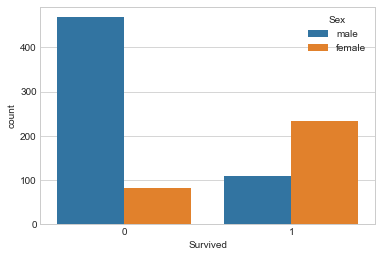

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)
#good variable

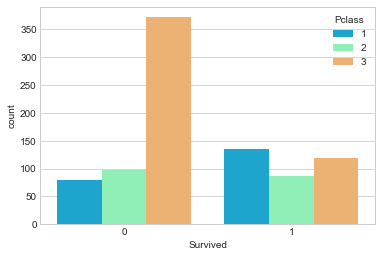

In [6]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
#good variable

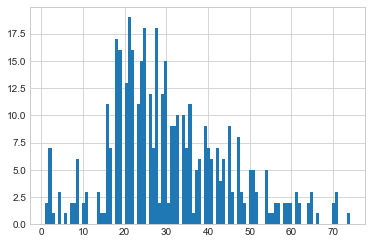

In [7]:
train[train["Survived"]==0]["Age"].hist(bins=100)

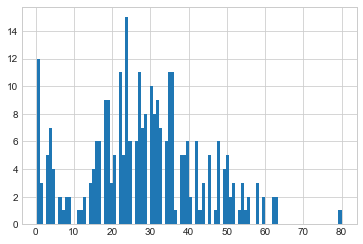

In [8]:
train[train["Survived"]==1]["Age"].hist(bins=100)
#good variable,but becomes noisy for people older that 16/18

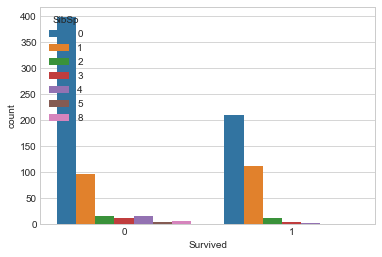

In [9]:
sns.countplot(x="Survived",hue="SibSp",data=train)
#not a good regressor/the data is noisy

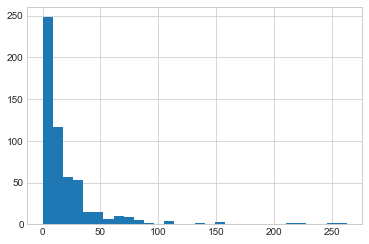

In [10]:
train[train["Survived"]==0]["Fare"].hist(bins=30)

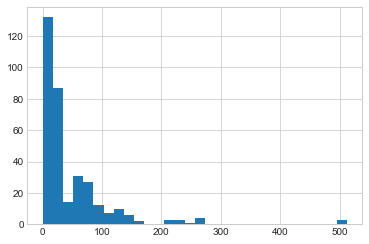

In [11]:
train[train["Survived"]==1]["Fare"].hist(bins=30)
#not a good regressor/the data is noisy

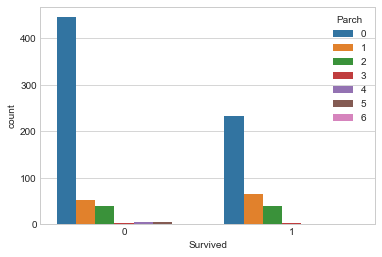

In [12]:
sns.countplot(x="Survived",hue="Parch",data=train)
#not a good regressor/the data is noisy

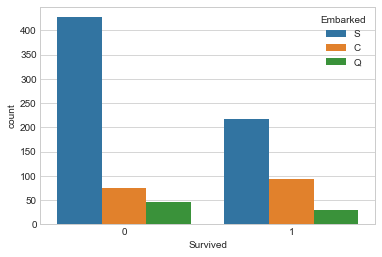

In [13]:
sns.countplot(x="Survived",hue="Embarked",data=train)
#not a good regressor/the data is noisy

In [14]:
def is_na(x):
    if pd.isnull(x):
        return 1
    else:
        return 0
train["Cabinisnull"]=train["Cabin"].apply(is_na)
#testing if having a cabin number is a good regressor

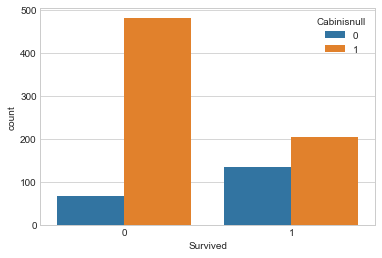

In [15]:
sns.countplot(x="Survived",hue="Cabinisnull",data=train)
#good variable

In [16]:
def under16(x):
    if x<=16:
        return 1
    else:
        return 0
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
#making dummy variables with sex and embark collums
train["Ageis16"]=train["Age"].apply(under16)
#making age a categorical variable , as discusted before
train.drop(['Sex','Embarked','Name','Ticket',"Cabin","Age","Fare","SibSp","Parch"],axis=1,inplace=True)
#droping collums that are not usefull
train = pd.concat([train,sex,embark],axis=1)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Cabinisnull,Ageis16,male,Q,S
0,1,0,3,1,0,1,0,1
1,2,1,1,0,0,0,0,0
2,3,1,3,1,0,0,0,1
3,4,1,1,0,0,0,0,1
4,5,0,3,1,0,1,0,1


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [19]:
from xgboost import XGBClassifier
my_model=XGBClassifier(n=1000,n_jobs=4)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)],
             verbose=True)

[0]	validation_0-error:0.201493
Will train until validation_0-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.201493
[2]	validation_0-error:0.205224
[3]	validation_0-error:0.205224
[4]	validation_0-error:0.205224
[5]	validation_0-error:0.205224
Stopping. Best iteration:
[0]	validation_0-error:0.201493



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n=1000, n_estimators=100, n_jobs=4, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [20]:
pred=my_model.predict(X_test)

C:\Users\DIOGO\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[[149   5]
 [ 49  65]]
             precision    recall  f1-score   support

          0       0.75      0.97      0.85       154
          1       0.93      0.57      0.71       114

avg / total       0.83      0.80      0.79       268



In [22]:
test["Cabinisnull"]=test["Cabin"].apply(is_na)
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
test["Ageis16"]=test["Age"].apply(under16)
test.drop(['Sex','Embarked','Name','Ticket',"Cabin","Age","Fare","SibSp","Parch"],axis=1,inplace=True)
test = pd.concat([test,sex,embark],axis=1)

In [23]:
pred=my_model.predict(test)
final=pd.DataFrame()
final["PassengerId"]=test["PassengerId"]
final["Survived"]=pred
final.to_csv("final",index=False)

C:\Users\DIOGO\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
